## CTS1 growth rate effect

In [2]:
import numpy as np
from scipy.stats import norm
from scipy import stats
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab 
import warnings
from statistics import multimode
from scipy.stats import erlang
warnings.filterwarnings('ignore')

import os

In [11]:
cd /Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Manuscript/Data/Figure4/cts1_growth_rate/beta-cts1_1/Results/rep1_results/

/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Manuscript/Data/Figure4/cts1_growth_rate/beta-cts1_1/Results/rep1_results


In [12]:
files=sorted(os.listdir())
counts=[]
count_data_1=pd.DataFrame()

for f in files:
    if('be' in f):
        df=pd.read_csv(f)['counts']
        df.name=f[0:f.index('.csv')]
        count_data_1=pd.concat([count_data_1,df],axis=1)



In [13]:
cd /Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Manuscript/Data/Figure4/cts1_growth_rate/beta-cts1_1/Results/rep2_results/

/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Manuscript/Data/Figure4/cts1_growth_rate/beta-cts1_1/Results/rep2_results


In [14]:
files=sorted(os.listdir())
counts=[]
count_data_2=pd.DataFrame()

for f in files:
    if('be' in f):
        df=pd.read_csv(f)['counts']
        df.name=f[0:f.index('.csv')]
        count_data_2=pd.concat([count_data_2,df],axis=1)


In [15]:
mean_1=np.array(count_data_1.mean()).reshape(3,3).round(1)
mean_2=np.array(count_data_2.mean()).reshape(3,3).round(1)

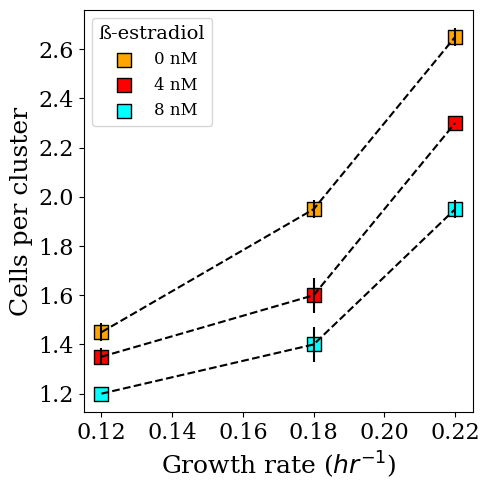

In [16]:
plt.rc('font',family='serif')

plt.figure(figsize=(5,5))
growth_rates=[0.12,0.18,0.22]

mean_d2=np.mean([mean_1[:,0],mean_2[:,0]],axis=0)
std_d2=np.std([mean_1[:,0],mean_2[:,0]],axis=0)/np.sqrt(2)
plt.scatter(growth_rates,mean_d2,marker='s',s=100,color='orange',edgecolors='black')
plt.errorbar(growth_rates,mean_d2,std_d2,color='black',linestyle='--')

mean_d005=np.mean([mean_1[:,1],mean_2[:,1]],axis=0)
std_d005=np.std([mean_1[:,1],mean_2[:,1]],axis=0)/np.sqrt(2)
plt.scatter(growth_rates,mean_d005,marker='s',s=100,color='red',edgecolors='black')
plt.errorbar(growth_rates,mean_d005,std_d005,color='black',linestyle='--')

mean_d0025=np.mean([mean_1[:,2],mean_2[:,2]],axis=0)
std_d0025=np.std([mean_1[:,2],mean_2[:,2]],axis=0)/np.sqrt(2)
plt.scatter(growth_rates,mean_d0025,marker='s',s=100,color='cyan',edgecolors='black')
plt.errorbar(growth_rates,mean_d0025,std_d0025,color='black',linestyle='--')

plt.xlabel('Growth rate ($hr^{-1}$)',fontsize=18)
plt.ylabel('Cells per cluster',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['0 nM','4 nM','8 nM'],fontsize=12,title='ß-estradiol').get_title().set_fontsize(14)
plt.tight_layout()
# plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/cts1_breaking_rate_growth_rate.jpg',dpi=600)


### As in model

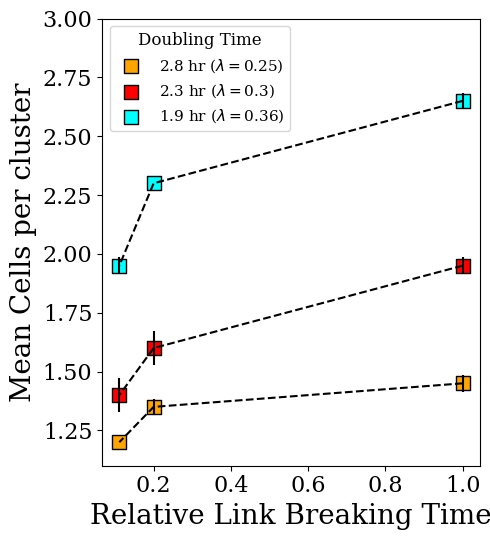

In [17]:
## plt.rc('font',family='helvetica')

plt.figure(figsize=(5,5.5))
bt=1/(1+np.array([0,4,8]))
dt=np.round(0.693/np.array([0.25,0.3,0.36]),1)

dt_list=[str(d)+' hr '+'('+r'$\lambda = $'+str(np.round(0.693/d,2))+')' for d in dt]

mean_d2=np.mean([mean_1[0,:],mean_2[0,:]],axis=0)
std_d2=np.std([mean_1[0,:],mean_2[0,:]],axis=0)/np.sqrt(2)
plt.scatter(bt,mean_d2,marker='s',s=100,color='orange',edgecolors='black')
plt.errorbar(bt,mean_d2,std_d2,color='black',linestyle='--')

mean_d005=np.mean([mean_1[1,:],mean_2[1,:]],axis=0)
std_d005=np.std([mean_1[1,:],mean_2[1,:]],axis=0)/np.sqrt(2)
plt.scatter(bt,mean_d005,marker='s',s=100,color='red',edgecolors='black')
plt.errorbar(bt,mean_d005,std_d005,color='black',linestyle='--')

mean_d0025=np.mean([mean_1[2,:],mean_2[2,:]],axis=0)
std_d0025=np.std([mean_1[2,:],mean_2[2,:]],axis=0)/np.sqrt(2)
plt.scatter(bt,mean_d0025,marker='s',s=100,color='cyan',edgecolors='black')
plt.errorbar(bt,mean_d0025,std_d0025,color='black',linestyle='--')

plt.xlabel('Relative Link Breaking Time',fontsize=20)
plt.ylabel('Mean Cells per cluster',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(dt_list,fontsize=11,title='Doubling Time').get_title().set_fontsize(12)
plt.ylim(1.1,3)
plt.tight_layout()
# plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/cts1_breaking_rate_doub_time_new.jpg',dpi=600)



